# Assignment 1 (part I): Line Fitting and other "stuff"

## Problem 1
### Prove that any roto-reflective transformation $R^n \rightarrow R^n$ defined by $n\times n$ orthogonal matrix $R$ (s.t. $R^TR=I$) preserves (a) parallel lines and (d) distances between points. Your proof should use only linear algebraic equations. HINTS: you can use line equations of the following format: $p_t=p_o + t\,u$ where $p$ are n-vectors representing points on a line, $u$ is a vector defining the line's direction, and $t$ is a scalar parameter. For distances $d(a,b)$ between points $a,b\in R^n$ you can use $d^2(a,b)=(a-b)^T (a-b)$. NOTE that all your linear algebraic equations in the proof should work for arbitrary $n\times n$ roto-reflective transformations/matrices.

Solution:
a) Let u and v be two non-zero parallel vectors in $R^n$. We can write u = kv for some $k \in R. k \neq 0$. With the linear transformation with matrix R, we have Rv and $Ru = R(kv) = k \cdot Rv$. The new vector Ru remains to have a linear dependent relationship with Rv, implies that they are still parallel.

b) Let a, b be two points in $R^n$. We have $d^2(a,b)=(a-b)^T (a-b)$ where $d(a, b)$ represents the distance between a and b. After transformation, the distance between points Ra, Rb will follow $$d^2(Ra,Rb)=(Ra-Rb)^T (Ra-Rb) = R^T \cdot (a-b)^T \cdot R \cdot (a-b) 
$$$$= R^T R \cdot (a-b)^T(a-b) = I (a-b)^T(a-b) = (a-b)^T (a-b) = d^2 (a-b)$$
$$\Rightarrow d(a, b) = |d(Ra, Rb)| = d(Ra, Rb)$$
since the distance is always non-negative. So the distances between points also preserve.

## Problem 2
### Prove that affine transformations map lines onto lines. For this, take an arbitrary line in $R^2$ and show that an arbitrary affine transform maps it onto a set of points that also satisfies a line equation. You should use homogeneous representation of lines, i.e. equations $l^\top x=0$ where $l$ is a 3-vector of line parameters (so called, homogeneous line representation) and $x$ is a 3-vector (homogeneously) representing a point on the line. 
### HINT: Use 3x3 matrices $A$ to represent affine transforms, as in Topic 4. Find simple linear-algebraic equation for the transformed line parameters $l'$ given $A$ and the original line $l$.

Solution: Let $l^\top x=0$ where $l = \left[ \begin{matrix} m_1 \\ m_2 \\ m_3 \end{matrix} \right]$ is a 3-vector of line parameters and $x = \left[ \begin{matrix} x_1 \\ x_2 \\ w \end{matrix} \right]$ is a 3-vector (homogeneously) representing a point on the line.

An affine transformation can be represented by $A = \left[ \begin{matrix} a & b & c \\ d & e & f \\ 0 & 0 & 1  \end{matrix} \right]$


So the point after affine transformation is defined by $x' = Ax$.

Homogenoeusly tranform the l to l' (a 3-vector of line parameter) by letting $l' = (A^{-1})^T l$ (such $(A^{-1})^T$ exists because any affine map has an inverse).

Then we have $l'^T x' = ((A^{-1})^T l)^T (Ax) = l^T A^{-1} (A x) = l^T (A^{-1} A) x = l^T x = 0$

So any point on the line after affine transformation will satisfy the new line equation $l'^T x' = 0$, implies that the original line is mapped onto the new line $l'$.

## NOTE: Problems 3-7 below are mostly coding excersices where you should implement and/or test different standard methods for model fitting on examples with synthetic and real data. Part II of this Assignemnt requires homography estimation in a real application (panorama mosaicing). The problems below were primarily designed to help the students learn the basics of model parameter estimation in a much more basic context - simple line models and 2D data points (synthetic or real). 
### While the provided initial notebook shows synthetic and real examples of 2D data points for line fitting, you might need to restart the nootebook (Kernel->Restart and Clear Output).

## Problem 3: least-squares and line fitting in 2D (synthetic data without outliers)
### Complete implementation of function $estimate$ of class $LeastSquareLine$ in the second cell below. It should update line parameters $a$ and $b$ correpsonding to line model $y=ax+b$. You can use either SVD of matrix $A$ or inverse of matrix $A^T A$, as mentioned in class. NOTE: several cells below test your code.

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import ransac

%matplotlib widget  

#### TO IMPLEMENT: complete (fix) the code in the following cell. Note that solution has 2-3 lines. You can use $svd$ function in $la$ and/or standard matrix operations from $np$.

In [11]:
class LeastSquareLine:

    def __init__(self):
        self.a = 0.0
        self.b = 0.0
        
    def estimate(self, points2D):
        B = points2D[:,1]
        A = np.copy(points2D)
        A[:,1] = 1.0 

        # Vector B and matrix A are already defined. Change code below
        U, S, VT = la.svd(A, full_matrices=False)
        W = np.diag(S)
        Ainverse = np.dot(np.transpose(VT), np.dot(la.inv(W), np.transpose(U)))
        # print(Ainverse)
        X = Ainverse.dot(B)
        self.a = X[0]
        self.b = X[1]
        return True
        
    def predict(self, x): return (self.a * x) + self.b
    
    def predict_y(self, x): return (self.a * x) + self.b
            
    def residuals(self, points2D):
        return points2D[:,1] - self.predict(points2D[:,0])
    
    def line_par(self):
        return self.a, self.b

#### Working code below generates (simulates) data points in ${\cal R}^2$ corresponding to noisy observations of a line.

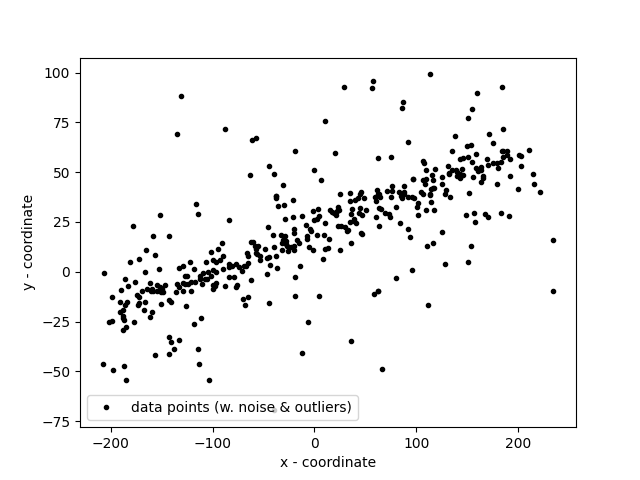

In [12]:
np.random.seed(seed=1)

# parameters for "true" line y = a*x + b
a, b = 0.2, 20.0

# x-range of points [x1,x2]
x_start, x_end = -200.0, 200.0

# generate "idealized" line points
x = np.arange(x_start,x_end)
y = a * x + b               
data = np.column_stack([x, y])    # staking data points into (Nx2) array

# add gaussian pertubations to generate "realistic" data points (noisy line observations)
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data += 5 * noise
data[::2] += 10 * noise[::2]  # every second point adds noise with variance 5
data[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

# IMPORTANT COMMENT!!!!!!!: 
# the data now combines line points with different levels of additive Gaussie noise.
# Consider all these noisy points as inliers.
# Do not consider any of these as outliers. The outliers are added in Problem 4.


fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

#### Use the following code-cell to test your implementation of class $LeastSquareLine$ in Problem 3 for line fitting when observed data is noisy. The estimated line is displayed in the cell above.  Note that the initial result shown in Fig.1 of the provided notebook corresponds to the line $a=0,b=0$ returned by initial code for $LeastSquareLine$.  Your correct solution for $LeastSquareLine$ should return a line very close to the known (ground-truth) line model.

True


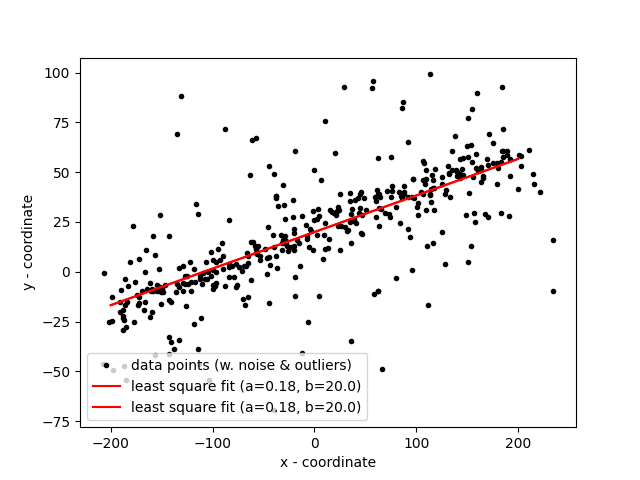

In [14]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print (LSline.estimate(data))
a_ls, b_ls = LSline.line_par()

# visualizing estimated line
ends = np.array([x_start,x_end])
ax.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
ax.legend(loc='lower left')
plt.show()

## Problem 4: RANSAC for robust line fitting in 2D (synthetic data with outliers)

#### Working code in the cell below corrupts data with outliers.

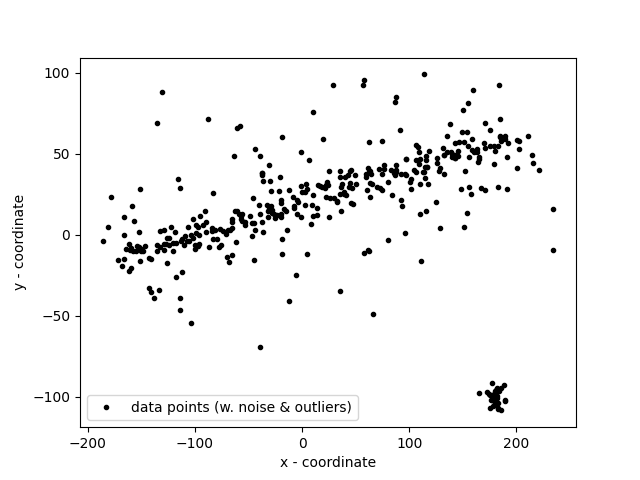

In [19]:
# add outliers
faulty = np.array(30 * [(180., -100)])  # (30x2) array containing 30 rows [180,-100]  (points)
faulty += 5 * np.random.normal(size=faulty.shape)  # adding Gaussian noise to these points
data[:faulty.shape[0]] = faulty   # replacing the first 30 points in data with faulty (outliers)


fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

### NOTE: As clear from the code for data simulation, (creation of) outliers has nothing to do with the line. In contrast, all other points originate from some points on the true (perfect) line, see Probelm 3. The added Gaussian errors (large or small) simulate complex noise that commonly happens between true (but unknown) model and its real observations (data). The whole point of "model fitting" is to estimate (or restore) a "model" (e.g. line parameters) from its noisy observations (data). If data has no noise, it is trivial, e.g. only two line points would be enough to compute the line parameters exactly. In the presence of noise, one can use methods like least-squres to approximately estimate a line (parameters minimizing the loss functing summing squared $L_2$ errors), see Problem 3. However, if data is corrupted by outliers that have nothing to do with the model, as in Problem 4, more robust model fitting methods are needed, e.g. RANSAC.

#### The code below uses your implementation of class $LeastSquareLine$ from Probelm 3 for least-square line fitting when the data is corrupted with outliers. The estimated line is displayed in the cell above. Observe the differences with the result in Problem 3.

True


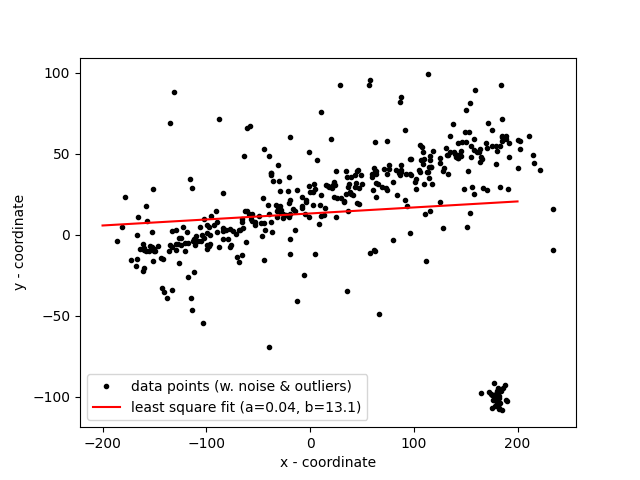

In [20]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print (LSline.estimate(data))
a_ls, b_ls = LSline.line_par()

# visualizing estimated line
ends = np.array([x_start,x_end])
ax.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
ax.legend(loc='lower left')
plt.show()

### (part a) Assume that a set of $N=100$ points in $2D$ includes $N_i=20$ inliers for one line and $N_o=80$ outliers. What is the least number of times one should sample a random pair of points from the set to get probability $p\geq 0.95$ that in at least one of the sampled pairs both points are inliers? Derive a general formula and compute a numerical answer for the specified numbers.

Solution:
We can assume we use sample with replacement. Sampling with replacement will certainly give a larger number of time that one can get probability $p\geq 0.95$ that at least one of the sampled pairs both points are inliers compared to using sample without replacement, so that the number n we get will also guarantee that one can get probability $p\geq 0.95$ that at least one of the sampled pairs both points are inliers compared to using sample without replacement.

Sample with replacement: P(the sample pair is not both points inliers) = 1 - P(the sample pair both points are inliers) = $1 - (20/100)^2 = 1 - 0.04 = 0.96$

P (at least one of the sampled pairs both points are inliers) = 1 - P (none of the sampled pairs both points are inliers）= $1 - (0.96)^n \geq 0.95$
$$\Rightarrow n \geq 74 $$

Thus, the least number of times one should sample a random pair of points from the set to get probability $p\geq 0.95$ that in at least one of the sampled pairs both points are inliers is 74.

### (part b) Using the knowledge of the number of inliers/outliers in the example at the beginning of Problem 4, estimate the minimum number of sampled pairs needed to get RANSAC to "succeed" (to get at least one pair of inliers) with $p\geq 0.95$. Use your formula in part (a). Show your numbers in the cell below. Then, use your estimate as a value of parameter $max\_trials$  inside function $ransac$ in the code cell below and test it.  You should also change $residual\_threshold$ according to the noise level for inliers in the example. NOTE: the result is displayed in the same figure at the beginning of Problem 4.

Your estimates:
There are 30 outliers and 400-30=370 inliers in this dataset. 

Sample with replacement: P(the sample pair is not both points inliers) = 1 - P(the sample pair both points are inliers) = $1 - (370/400)^2 = 1 - 0.925^2 = 0.144375$

P (at least one of the sampled pairs both points are inliers) = 1 - P (none of the sampled pairs both points are inliers）= $1 - (0.144375)^n \geq 0.95$
$$\Rightarrow n \geq 2 $$

In [21]:
# robustly fit line using RANSAC algorithm
model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=25, max_trials=2)
a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')

## Problem 5: sequential RANSAC for robust multi-line fitting (synthetic data)

#### Adding data points supporting one more line

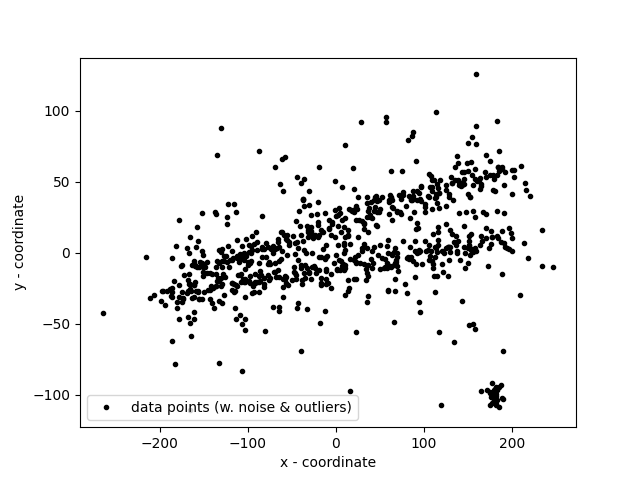

In [22]:
# parameters for "true" lines y = a*x + b
a2, b2 = 0.1, -10.0

# generate "idealized" line points
y2 = a2 * x + b2
data2 = np.column_stack([x, y2])    # staking data points into (Nx2) array

# add gaussian pertubations to generate "realistic" line data
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data2+= 5 * noise
data2[::2] += 10 * noise[::2]  # every second point adds noise with variance 5
data2[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

data = np.concatenate((data,data2)) # combining with previous data

fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()


### Write code below using sequential RANSAC to detect two lines in the data above. Your lines should be displayed in the figure above (in Problem 5).

In [23]:
# robustly fit line using RANSAC algorithm
model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=25, max_trials=10)
a_rs, b_rs = model_robust.line_par()
new_data = np.copy(data)

i = len(inliers)-1
while i >= 0:
    if inliers[i] == True:
        new_data = np.delete(new_data, i, 0)
        i=i-1
    i=i-1
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))

model_robust1, inliers1 = ransac(new_data, LeastSquareLine, min_samples=2, residual_threshold=25, max_trials=10)
a_rs1, b_rs1 = model_robust1.line_par()

line_x1 = np.arange(-250, 250)
line_y_robust1 = model_robust1.predict_y(line_x1)

ax.plot(new_data[inliers1, 0], new_data[inliers1, 1], '.r', alpha=0.6, label='Inlier data 2')
ax.plot(line_x1, line_y_robust1, '-r', label='RANSAC line 2 (a={:4.2f}, b={:4.1f})'.format(a_rs1,b_rs1))
# # generate coordinates of estimated models

ax.legend(loc='lower left')

## Problem 6: multi-line fitting for real data (Canny edges)
### NOTE: while there are real applications that require estimation of lines in images, their detailed description is outside the scope of this assignment. This problem is mostly for fun. However, it also demostrates a real example of simple 2D feature points (based on contrast edges) that can be used for estimating real geometric models (lines). More advanced real examples of feature points and geometric model estimation can be found in part II of this Assignment.

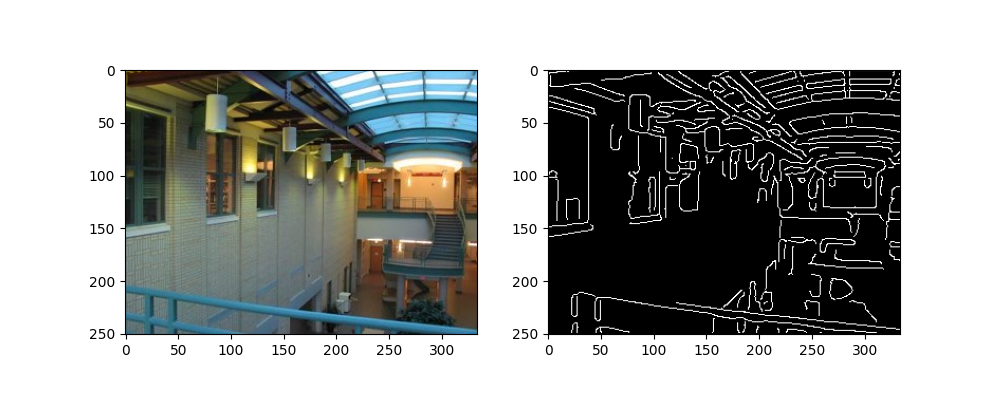

In [24]:
import matplotlib.image as image
from skimage import feature
from skimage.color import rgb2gray

im = image.imread("images/CMU_left.jpg")
imgray = rgb2gray(im)
can = feature.canny(imgray, 2.0)

plt.figure(24,figsize = (10, 4))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(can,cmap="gray")
plt.show()

## use sequestial-RANSAC to find  𝐾  lines

In [25]:
K = 5 
# NOTE 1: write your code using a function that takes K as a parameter. 
# NOTE 2: Present visual results for some value of K 
# NOTE 3: Your code should visually show detected lines in a figure 
#         over the image (either the original one or over the Canny edge mask)
# NOTE 4: You may need to play with parameters of function ransac 
#         (e.g. threshold and number of sampled models "max_trials")
#         Also, you can introduce one extra parameter for the minimum number of inliers 
#         for accepting ransac-detected lines.

# NOTE: "can" in the cell above is a binary mask with True and False values, e.g. 

def findXRange(mydata, inliers):
    xStart = 1000
    xEnd = 0
    for i in range(len(inliers)):
        if inliers[i] == True:
            if mydata[i][0] > xEnd:
                xEnd = mydata[i][0]
            if mydata[i][0] < xStart:
                xStart = mydata[i][0]
    return [xStart, xEnd]
            
def CannyRANSAC(k, img):
    mydata = np.array([])
    
    if len(img.shape) == 3:
        img = rgb2gray(img)
        imd = np.gradient(img)
        
        new_imd = imd[0]+imd[1]
        for i in range(new_imd.shape[0]):
            for j in range(new_imd.shape[1]):
                if new_imd[i, j] >= 0.06:
                    mydata = np.append(mydata, [j,i])
        mydata = mydata.reshape((-1, 2))

    # plt.plot(mydata[:, 0], mydata[:, 1], '.')
    
    for i in range(k):
        model_robust, inliers = ransac(mydata, LeastSquareLine, min_samples=2, residual_threshold=2, max_trials=500)
        a_rs, b_rs = model_robust.line_par()

        xStart, xEnd = findXRange(mydata, inliers)[0], findXRange(mydata, inliers)[1]
        # print(xStart, xEnd)
        line_x = np.arange(xStart, xEnd)
        line_y_robust = model_robust.predict_y(line_x)
        plt.plot(line_x, line_y_robust, '-b')
        
        i = len(inliers)-1
        while i >= 0:
            if inliers[i] == True:
                mydata = np.delete(mydata, i, 0)
                i=i-1
            i=i-1


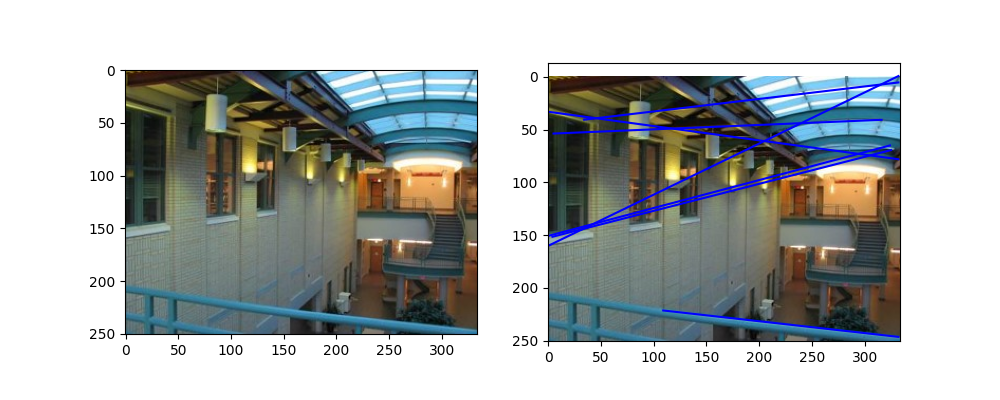

In [26]:
plt.imshow(im)
CannyRANSAC(7, im)
plt.show()
# Comment: Unable to accurately find the start and end of the interval of line is a challenge that I'm unable to resolve.